<h1 style="text-align: center;">Dataset: Seoul Bike Sharing Demand</h1>
<h4 style="text-align: center;">Ghani Haider |  github.com/Ghani-Haider/</h4>

The [dataset](https://archive-beta.ics.uci.edu/dataset/560/seoul+bike+sharing+demand) contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information. The goal is to understand the trends in the data and indentify key factors affecting demand for rental bikes. I will also build a regression model to predict the amount of rental bikes required per hour.

The dataset consist of following features:
- feature : unit

<h3>Objectives</h3>
<ul>
    <li> Dataset Pre-processing: Checking for outliers, duplicates, missing values and data-type corrections.
    <li> Feature Extraction
    <li> Exploratory Data Analysis (EDA)
    <li> Feature Selection
    <li> Feature Encoding
    <li> Feature Scaling
    <li> Developing prediction model
    <li> Evaluation and refinement of prediction model through hyper-parameter tuning
</ul>

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Read the Dataset</h2>

- Displaying Concise Summary
- Displaying Statistical summary of given metrics

In [2]:
# read the dataset
df = pd.read_csv('data/MLF_GP1_CreditScore.csv')

In [6]:
# read the first 5 rows
df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [7]:
# concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales/Revenues            1700 non-null   float64
 1   Gross Margin              1700 non-null   float64
 2   EBITDA                    1700 non-null   float64
 3   EBITDA Margin             1700 non-null   float64
 4   Net Income Before Extras  1700 non-null   float64
 5   Total Debt                1700 non-null   float64
 6   Net Debt                  1700 non-null   float64
 7   LT Debt                   1700 non-null   float64
 8   ST Debt                   1700 non-null   float64
 9   Cash                      1700 non-null   float64
 10  Free Cash Flow            1700 non-null   float64
 11  Total Debt/EBITDA         1700 non-null   float64
 12  Net Debt/EBITDA           1700 non-null   float64
 13  Total MV                  1700 non-null   float64
 14  Total De

In [8]:
# statistical summary of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales/Revenues,1700.0,0.050378,0.161910,-0.661715,-0.005693,0.034000,0.083004,2.277229
Gross Margin,1700.0,0.026007,0.273768,-0.794722,-0.020028,0.003403,0.025595,3.202713
EBITDA,1700.0,0.068718,0.237365,-0.782254,-0.022640,0.049482,0.124533,3.542425
EBITDA Margin,1700.0,0.021074,0.189025,-0.805153,-0.042771,0.011134,0.060566,4.141182
Net Income Before Extras,1700.0,0.123026,14.475689,-289.000000,-0.158478,0.056627,0.222219,478.280075
Total Debt,1700.0,0.822405,13.317075,-0.903014,-0.076316,0.005886,0.136449,281.604237
Net Debt,1700.0,-0.419810,28.385702,-493.305578,-0.120725,-0.003060,0.160251,865.194595
LT Debt,1700.0,1.255168,16.224453,-0.921515,-0.094767,-0.002078,0.174735,289.388178
ST Debt,1700.0,3.142797,51.986550,-0.997692,-0.337959,0.043092,0.649475,2038.000000
Cash,1700.0,0.466620,1.859494,-0.990982,-0.195117,0.075820,0.483113,36.980037


Here we can observe class imbalance for the target variable 'InvGrd'


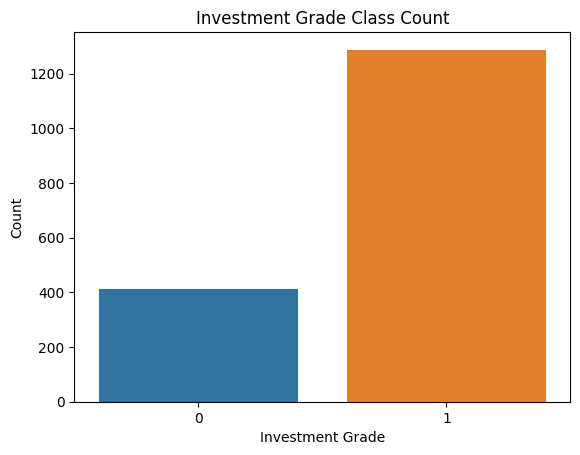

In [35]:
# target variable (InvGrd) values
print(f"Here we can observe class imbalance for the target variable 'InvGrd'")
sns.countplot(x=df['InvGrd'])
plt.title('Investment Grade Class Count')
plt.ylabel('Count')
plt.xlabel('Investment Grade')
plt.show()

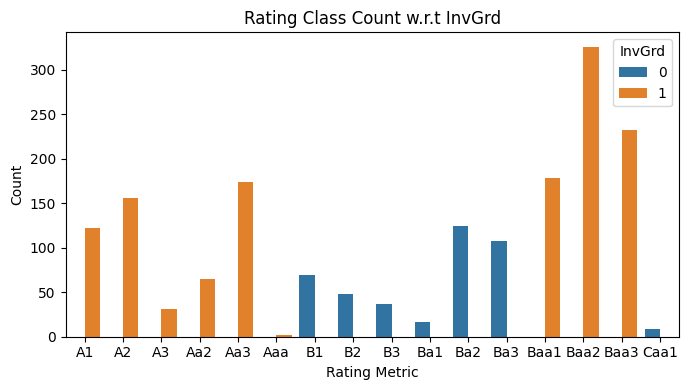

In [72]:
# second target variable (Rating) values
plt.figure(figsize=(7, 4))
sns.countplot(x=df['Rating'], hue=df['InvGrd'])
plt.title('Rating Class Count w.r.t InvGrd')
plt.ylabel('Count')
plt.xlabel('Rating Metric')
plt.tight_layout()
plt.show()

<h2>Data Pre-processing</h2>

<h3>Handling Missing Data</h3>

In [9]:
print(f"All the columns have no missing values, so we're good to go.")
# missing value per column
df.isna().sum()

All the columns have no missing values, so we're good to go.


Sales/Revenues              0
Gross Margin                0
EBITDA                      0
EBITDA Margin               0
Net Income Before Extras    0
Total Debt                  0
Net Debt                    0
LT Debt                     0
ST Debt                     0
Cash                        0
Free Cash Flow              0
Total Debt/EBITDA           0
Net Debt/EBITDA             0
Total MV                    0
Total Debt/MV               0
Net Debt/MV                 0
CFO/Debt                    0
CFO                         0
Interest Coverage           0
Total Liquidity             0
Current Liquidity           0
Current Liabilities         0
EPS Before Extras           0
PE                          0
ROA                         0
ROE                         0
InvGrd                      0
Rating                      0
dtype: int64

<h3>Data Duplicates</h3>

In [12]:
print(f"The number of duplicated rows are: {df.duplicated().sum()}")

The number of duplicated rows are: 0


<h2>Exploratory Data Analysis</h2>

Exploring the relationship of features with each other and target variables.

In [41]:
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# # for hours
# hourly_bike_rent = df.groupby(['Hour']).agg({'Rented Bike Count': 'mean'})
# sns.lineplot(data=hourly_bike_rent, ax=ax[0][0])
# ax[0][0].set_title('Mean Bike Rent Per Hour')
# ax[0][0].legend().set_visible(False)
# ax[0][0].set_xticks(df['Hour'].unique().tolist())

# # for days
# daily_bike_rent = df.groupby(['Days']).agg({'Rented Bike Count': 'mean'})
# sns.lineplot(data=daily_bike_rent.sort_values('Rented Bike Count'), ax=ax[0][1])
# ax[0][1].set_title('Mean Bike Rent Per Day')
# ax[0][1].legend().set_visible(False)

# # for months
# monthly_bike_rent = df.groupby(['Months']).agg({'Rented Bike Count': 'mean'})
# sns.lineplot(data=monthly_bike_rent.sort_values('Rented Bike Count'), ax=ax[1][0])
# ax[1][0].legend().set_visible(False)
# ax[1][0].tick_params(axis='x', rotation=45)

# # for years
# yearly_bike_rent = df.groupby(['Years']).agg({'Rented Bike Count': 'mean'})
# sns.barplot(data=yearly_bike_rent, x=yearly_bike_rent.index, y=yearly_bike_rent['Rented Bike Count'], ax=ax[1][1])
# ax[1][1].set_title('Mean Bike Rent Per Year')

# plt.tight_layout()
# plt.show()

#### Features/metrics correlation with Target (Investment Grade)

Correlation of numeric features with target (InvGrd)


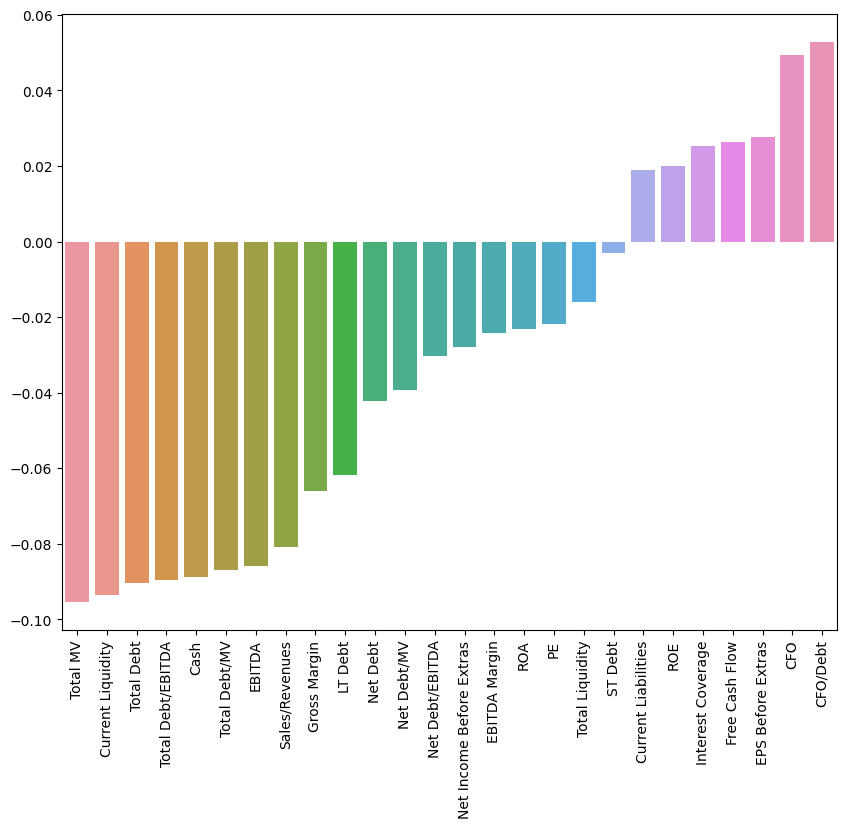

In [57]:
print('Correlation of numeric features with target (InvGrd)')
feat_corr = df.corr(numeric_only=True)['InvGrd'].sort_values().drop('InvGrd')
# plot feature correlation with InvGrd
plt.figure(figsize=(10, 8))
sns.barplot(x=feat_corr.index, y=feat_corr.values)
plt.tick_params(axis='x', rotation=90)
plt.show()

#### Creating a heatmap to display the correlation between all the columns.

<AxesSubplot: >

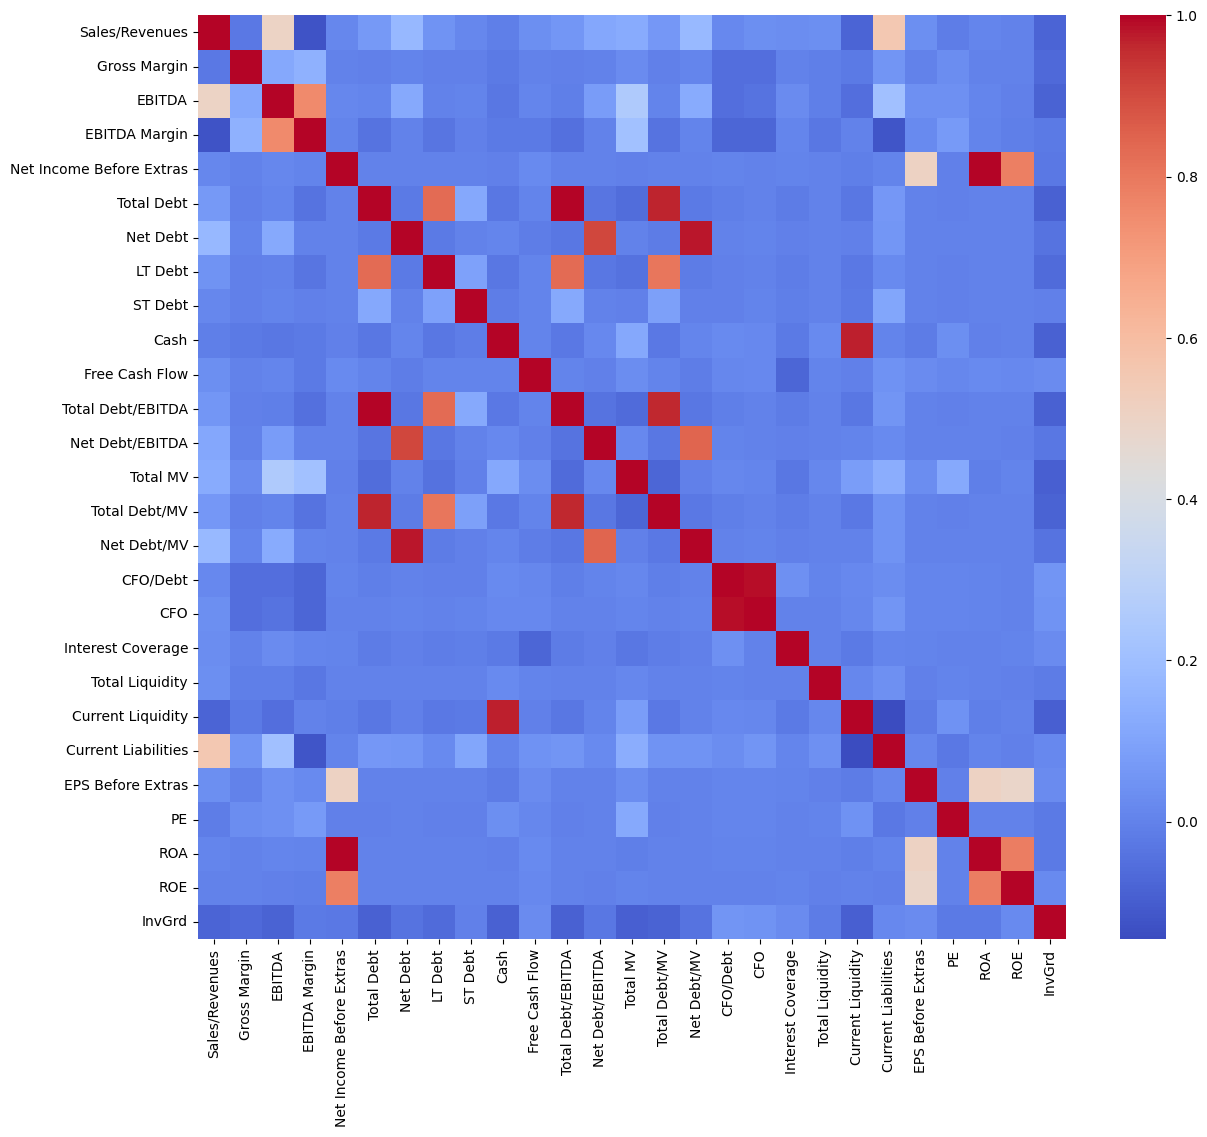

In [62]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')

#### Observation
- Very few features have linear relationship with target variable (InvGrd) as such.
- We can also observe multicollinearity between some features/metrics.

<h2>Feature Encoding</h2>

Encoding the "Rating" label to dummy variables in order to use while training the models to predict the investment grade.

In [73]:
def feature_encode(df):
    # numeric features
    num_features = df.select_dtypes(exclude='object')
    # categorical features
    cat_features = df.select_dtypes(include='object')
    # get dummy variables for categorical features
    dummy_features = pd.get_dummies(cat_features, drop_first=True)

    # merge into final dataframe
    df_final = pd.concat([num_features, dummy_features], axis=1)
    return df_final

df_invgrd = feature_encode(df)

In [79]:
# final features and label
df_invgrd.columns

Index(['Sales/Revenues', 'Gross Margin', 'EBITDA', 'EBITDA Margin',
       'Net Income Before Extras', 'Total Debt', 'Net Debt', 'LT Debt',
       'ST Debt', 'Cash', 'Free Cash Flow', 'Total Debt/EBITDA',
       'Net Debt/EBITDA', 'Total MV', 'Total Debt/MV', 'Net Debt/MV',
       'CFO/Debt', 'CFO', 'Interest Coverage', 'Total Liquidity',
       'Current Liquidity', 'Current Liabilities', 'EPS Before Extras', 'PE',
       'ROA', 'ROE', 'InvGrd', 'Rating_A2', 'Rating_A3', 'Rating_Aa2',
       'Rating_Aa3', 'Rating_Aaa', 'Rating_B1', 'Rating_B2', 'Rating_B3',
       'Rating_Ba1', 'Rating_Ba2', 'Rating_Ba3', 'Rating_Baa1', 'Rating_Baa2',
       'Rating_Baa3', 'Rating_Caa1'],
      dtype='object')

In [78]:
df_invgrd.to_csv('data/CreditScore_with_dummy.csv', index=False)

<h2>Creating The Linear Regression Model</h2>

Chosen Model:
- Elastic Net with GridSearchCV for optimal parameter selection in order to predict Investment Grade of a firm based on given metrics.

Elastic Net is a linear regression approach with combined L1 and L2 as regularizer.

Parameters:
- alpha: Strength of regularization/penalization.
- l1_ratio: Controls the strength/ratio of L1 & L2 regularizer.

<h3>Train Test Split and Feature Scaling</h3>

- Splitting the data into training and test set in a 80%:20% ratio.
- Also normalizing/scaling the input features to improve the model's training speed and performance.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/CreditScore_with_dummy.csv')
X = df.drop('InvGrd', axis=1)
y = df['InvGrd']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# scale/ normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training using GridSearchCV for hyper-parameter tuning</h3>

In [81]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# base model to tune
base_model = ElasticNet(max_iter=3000)

# hyper-parameter grid
param_grid = {'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                'alpha':[0.05, 0.1, 1, 5, 10, 50, 100]}
# grid search
reg_model = GridSearchCV(estimator=base_model,
                         param_grid=param_grid,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         verbose=0)
# train the model
reg_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=3000),
             param_grid={'alpha': [0.05, 0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [82]:
print(f"The best model optimal parameter values")
reg_model.best_estimator_

The best model optimal parameter values


ElasticNet(alpha=0.05, l1_ratio=0.1, max_iter=3000)

<h3>Prediction and Model Evaluation</h3>

Evaluating the model on the test set. Creating the following evaluations results:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Residual Plot
- Residual Distribution

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# plot different evaluation scores for given prediction
def scorer(y_test, y_pred):
    print(f"Mean Value of InvGrd Label:\t{np.mean(y)}")
    print(f"MAE Value:\t{mean_absolute_error(y_test, y_pred)}")
    print(f"MSE Value:\t{mean_squared_error(y_test, y_pred)}")
    print(f"RMSE Value:\t{np.sqrt(mean_squared_error(y_test, y_pred))}")
    
    residual = y_test - y_pred

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
    
    sns.scatterplot(x=y_test, y=residual, ax=ax[0])
    ax[0].axhline(y=0, color='red', ls='--')
    ax[0].set_title('Residual Plot')
    ax[0].set_xlabel('y test')
    ax[0].set_ylabel('residual')
    
    sns.kdeplot(data=residual, ax=ax[1])
    ax[1].set_title('Residual Distribution')
    ax[1].set_xlabel('residual')
    
    plt.tight_layout()
    plt.show()

In [84]:
y_pred = reg_model.predict(X_test_scaled)

==================== ElasticNet Regression Model ====================
Mean Value of InvGrd Label:	0.7570588235294118
MAE Value:	0.030454504956614493
MSE Value:	0.0014040842234287546
RMSE Value:	0.037471111852048836


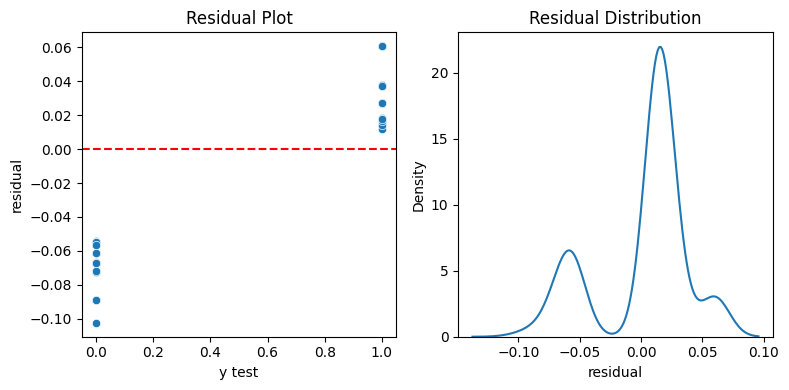

In [85]:
print(f"{'='*20} ElasticNet Regression Model {'='*20}")
scorer(y_test, y_pred)

<h2>Creating The Logistic Regression Model</h2>

Chosen Model:
- Logistic Regression with GridSearchCV for optimal parameter selection in order to predict Investment Grade of a firm based on given metrics.

Parameters:
- C: Inverse of regularization strength, smaller values specify stronger regularization.
- l1_ratio: Controls the strength/ratio of L1 & L2 regularizer.

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_model = LogisticRegression(solver='saga', multi_class='ovr', penalty='elasticnet')

# choosing different hyper-parameter values for cv
C = np.logspace(0, 4, 10)
l1_ratio = np.linspace(0, 1, 10)

# parameter grid for optimal hyper-parameter value search
param_grid = {'C': C,
              'l1_ratio': l1_ratio}

# grid search model
grid_model = GridSearchCV(log_model,
                          param_grid,
                          verbose=0)
# train the model
grid_model.fit(X_train_scaled, y_train)

/home/ghani/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ghani/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ghani/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ghani/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ghani/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ghani/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Con

GridSearchCV(estimator=LogisticRegression(multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])})

In [92]:
print(f"The best model optimal parameter values")
grid_model.best_estimator_

The best model optimal parameter values


LogisticRegression(l1_ratio=0.3333333333333333, multi_class='ovr',
                   penalty='elasticnet', solver='saga')

<h3>Prediction and Model Evaluation</h3>

Evaluating the model on the test set. Creating the following evaluations results:
- Classification Accuracy
- Classification Report
- Confusion Matrix Plot

Classification Accuracy: 0.9941176470588236

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        78
           1       1.00      0.99      1.00       262

    accuracy                           0.99       340
   macro avg       0.99      1.00      0.99       340
weighted avg       0.99      0.99      0.99       340



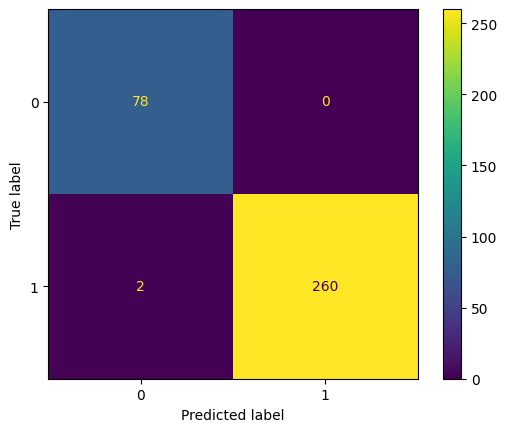

In [96]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

# predict test set
y_pred = grid_model.predict(X_test_scaled)

# model accuracy
print(f"Classification Accuracy: {accuracy_score(y_test, y_pred)}\n")

# model classfication report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

# plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Discussion

### Logistic
- did fairly well, problem being a classification one
- some misclassification for 0, prob due to class imbalance

<h3>Prediction on new input</h3>

In [78]:
# from joblib import dump
# from sklearn.pipeline import make_pipeline
# # create pipeline
# pipeline = make_pipeline(scaler, model)
# # fit the model on the complete dataset
# model = pipeline.fit(X.values, y)
# # save model
# dump(model, './model/bike_rent_count.mod')

# from joblib import load

# # load model and scaler
# model = load('./model/bike_rent_count.mod')

# # selecting the first input of the dataset
# given_input = [X.iloc[0].tolist()]

# print(f"predicted value: {model.predict(given_input)[0]}\nactual value: {y[0]}")



predicted value: 168.83177689349304
actual value: 254
